# Internship Feedback Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Load the dataset
df = pd.read_csv('internship_feedback_sentiment.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f" Dataset loaded successfully!")
print(f" Time period: {df['timestamp'].min().strftime('%Y-%m-%d')} to {df['timestamp'].max().strftime('%Y-%m-%d')}")
print(f" Total records: {len(df):,}")

 Dataset loaded successfully!
 Time period: 2024-01-01 to 2024-12-31
 Total records: 2,000


In [9]:
df.shape

(2000, 17)

In [5]:
df.columns

Index(['feedback_id', 'timestamp', 'department', 'feedback_source',
       'feedback_text', 'sentiment_label', 'sentiment_intensity',
       'rating_score', 'emotional_tone', 'word_count', 'character_count',
       'exclamation_count', 'question_count', 'intern_experience',
       'program_duration', 'has_suggestion', 'would_recommend'],
      dtype='object')

In [7]:
df.head()

,feedback_id,timestamp,department,feedback_source,feedback_text,sentiment_label,sentiment_intensity,rating_score,emotional_tone,word_count,character_count,exclamation_count,question_count,intern_experience,program_duration,has_suggestion,would_recommend
0,FB_00001,2024-01-17,Research,End-of-Program Survey,This internship exceeded my expectations. The ...,positive,0.78,4.7,satisfied,15,121,0,0,First Internship,8 weeks,False,True
1,FB_00002,2024-12-23,Business Analytics,Social Media,My mentor was great teacher. The Business Anal...,positive,1.00,4.8,grateful,15,108,0,0,Some Experience,16 weeks,False,True
2,FB_00003,2024-10-01,Software Engineering,Mentor Meeting,The internship experience was highly beneficia...,positive,0.76,4.4,satisfied,21,145,0,0,First Internship,6 months,False,True
3,FB_00004,2024-04-29,Marketing,Mentor Meeting,This internship exceeded my expectations. The ...,positive,0.92,5.0,excited,15,121,0,0,First Internship,6 months,False,True
4,FB_00005,2024-03-24,Research,Mentor Meeting,This internship exceeded my expectations. The ...,positive,0.88,4.3,grateful,15,115,0,0,Some Experience,6 months,False,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   feedback_id          2000 non-null   object        
 1   timestamp            2000 non-null   datetime64[ns]
 2   department           2000 non-null   object        
 3   feedback_source      2000 non-null   object        
 4   feedback_text        2000 non-null   object        
 5   sentiment_label      2000 non-null   object        
 6   sentiment_intensity  2000 non-null   float64       
 7   rating_score         2000 non-null   float64       
 8   emotional_tone       2000 non-null   object        
 9   word_count           2000 non-null   int64         
 10  character_count      2000 non-null   int64         
 11  exclamation_count    2000 non-null   int64         
 12  question_count       2000 non-null   int64         
 13  intern_experience    2000 non-nul

### TREND ANALYSIS - SENTIMENT OVER TIME

In [10]:
# Extract time features
df['date'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.isocalendar().week
df['day_of_week'] = df['timestamp'].dt.day_name()

In [5]:
# Monthly trend analysis
monthly_trends = df.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)
monthly_percentage = monthly_trends.div(monthly_trends.sum(axis=1), axis=0) * 100

# Weekly trend analysis
weekly_trends = df.groupby(['week', 'sentiment_label']).size().unstack(fill_value=0)
weekly_percentage = weekly_trends.div(weekly_trends.sum(axis=1), axis=0) * 100

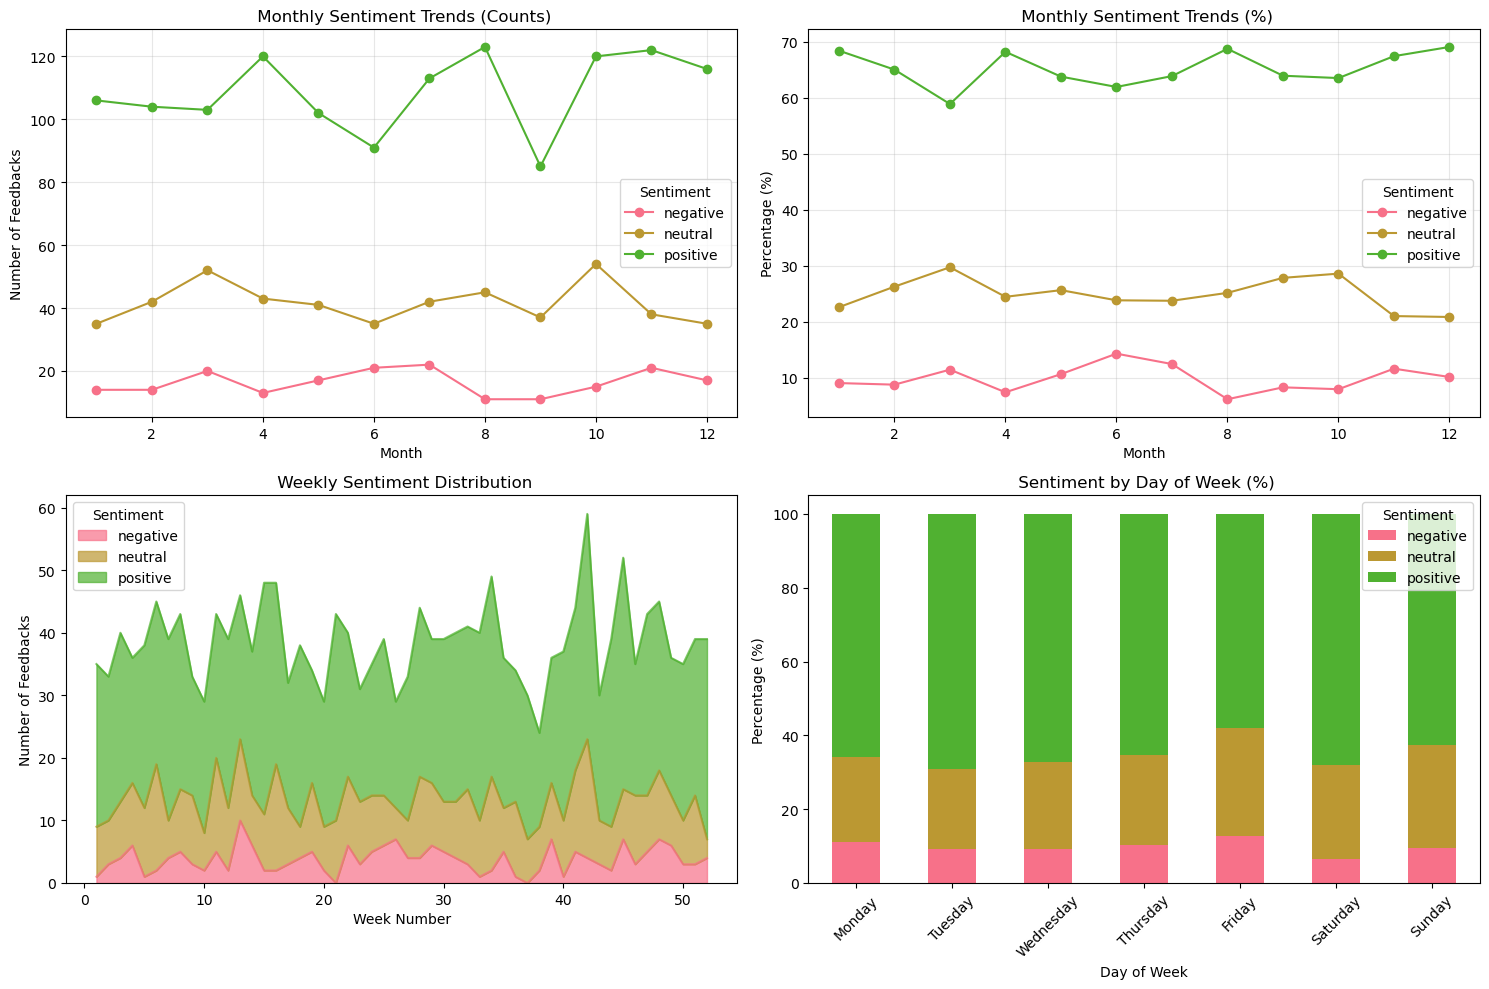

In [6]:
# Plot monthly trends
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
monthly_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title(' Monthly Sentiment Trends (Counts)')
plt.xlabel('Month')
plt.ylabel('Number of Feedbacks')
plt.grid(True, alpha=0.3)
plt.legend(title='Sentiment')

plt.subplot(2, 2, 2)
monthly_percentage.plot(kind='line', marker='o', ax=plt.gca())
plt.title(' Monthly Sentiment Trends (%)')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='Sentiment')

plt.subplot(2, 2, 3)
weekly_trends.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca())
plt.title(' Weekly Sentiment Distribution')
plt.xlabel('Week Number')
plt.ylabel('Number of Feedbacks')
plt.legend(title='Sentiment')

plt.subplot(2, 2, 4)
# Daily pattern analysis
daily_pattern = df.groupby(['day_of_week', 'sentiment_label']).size().unstack()
daily_pattern = daily_pattern.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_pattern_percentage = daily_pattern.div(daily_pattern.sum(axis=1), axis=0) * 100

daily_pattern_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(' Sentiment by Day of Week (%)')
plt.xlabel('Day of Week')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

In [7]:
# Key insights
print("\n TREND ANALYSIS INSIGHTS:")
print(f"• Peak positive sentiment month: Month {monthly_percentage['positive'].idxmax()} ({monthly_percentage['positive'].max():.1f}%)")
print(f"• Lowest positive sentiment month: Month {monthly_percentage['positive'].idxmin()} ({monthly_percentage['positive'].min():.1f}%)")
print(f"• Best performing day: {daily_pattern_percentage['positive'].idxmax()} ({daily_pattern_percentage['positive'].max():.1f}% positive)")


 TREND ANALYSIS INSIGHTS:
• Peak positive sentiment month: Month 12 (69.0%)
• Lowest positive sentiment month: Month 3 (58.9%)
• Best performing day: Tuesday (69.1% positive)


### SOURCE EFFECTIVENESS ANALYSIS

In [11]:
# Source distribution and sentiment patterns
source_analysis = df.groupby('feedback_source').agg({
    'sentiment_label': 'count',
    'rating_score': 'mean',
    'sentiment_intensity': 'mean',
    'word_count': 'mean'
}).rename(columns={'sentiment_label': 'total_feedbacks'})
source_sentiment = pd.crosstab(df['feedback_source'], df['sentiment_label'], normalize='index') * 100
source_analysis = source_analysis.join(source_sentiment)

# Calculate source effectiveness score (higher negative % = more honest?)
source_analysis['effectiveness_score'] = (
    source_analysis['negative'] * 1.5 +  # Weight negative feedback higher
    source_analysis['neutral'] * 1.0 +   # Neutral feedback
    source_analysis['positive'] * 0.5    # Positive feedback (lower weight)
)

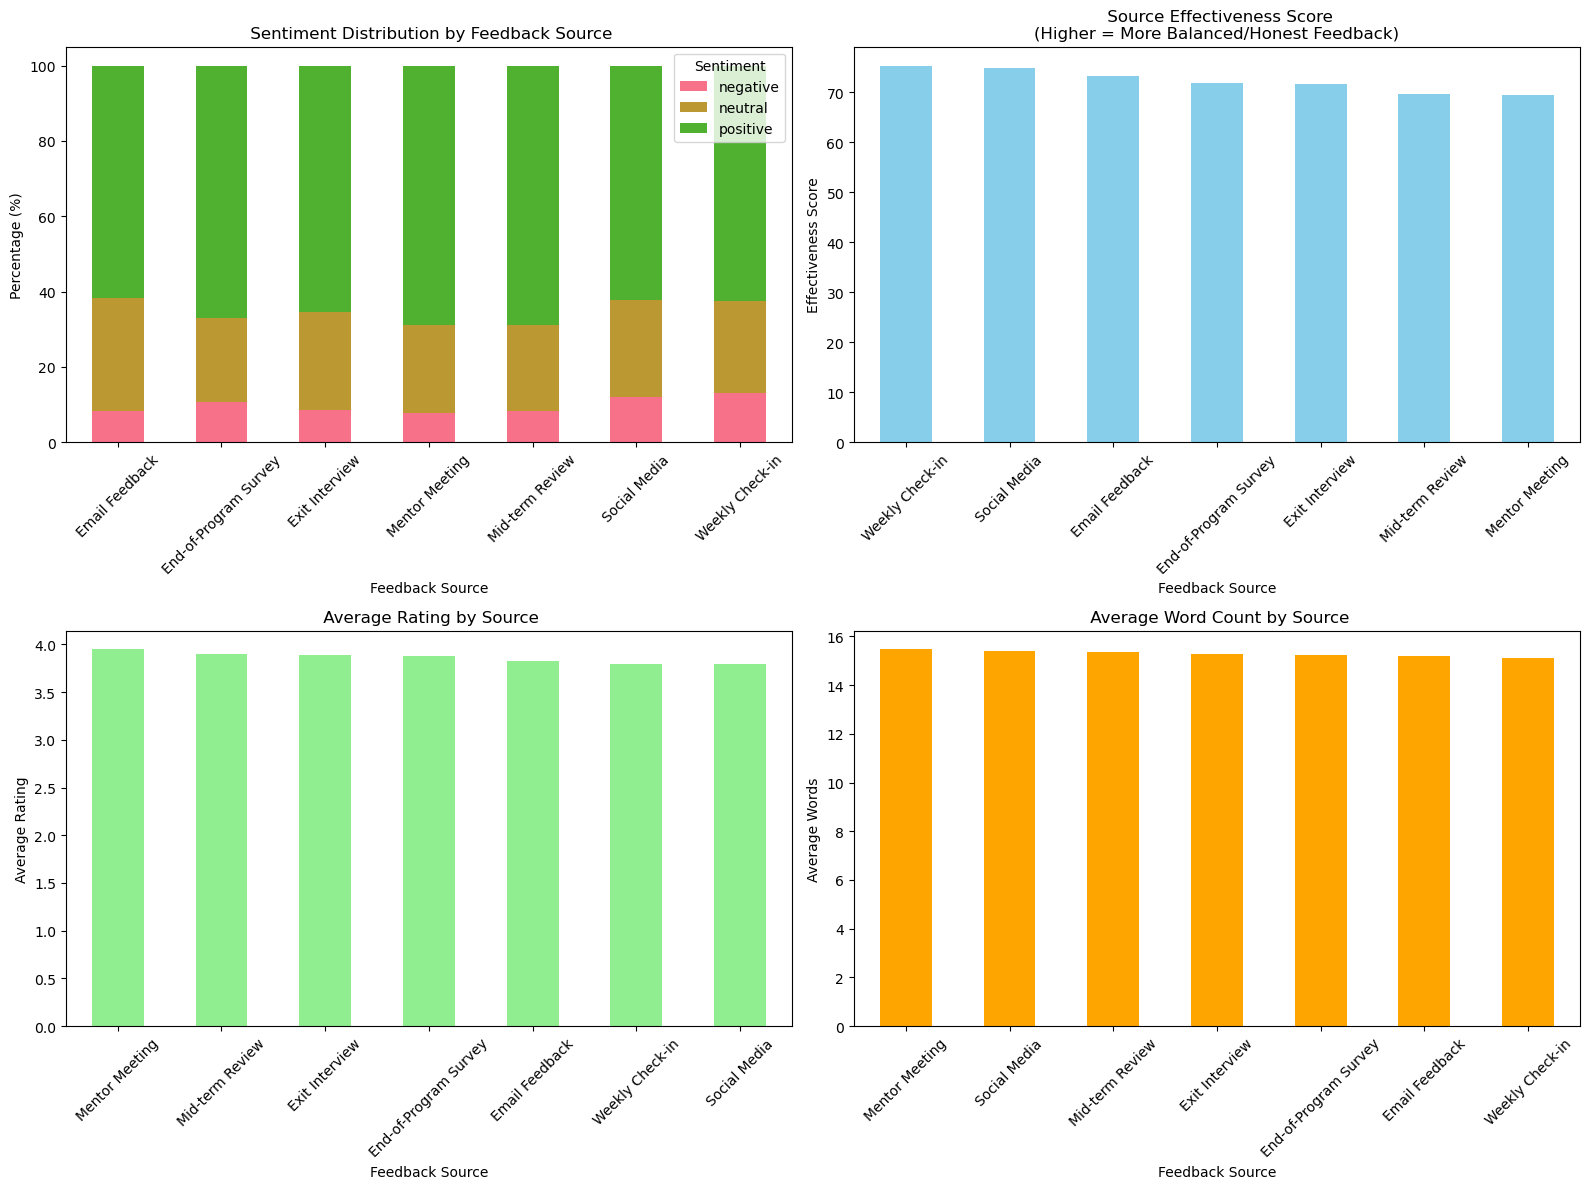

In [9]:
# Plot source analysis
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
source_sentiment.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(' Sentiment Distribution by Feedback Source')
plt.xlabel('Feedback Source')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

plt.subplot(2, 2, 2)
source_analysis['effectiveness_score'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(' Source Effectiveness Score\n(Higher = More Balanced/Honest Feedback)')
plt.xlabel('Feedback Source')
plt.ylabel('Effectiveness Score')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
source_analysis['rating_score'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title(' Average Rating by Source')
plt.xlabel('Feedback Source')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
source_analysis['word_count'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title(' Average Word Count by Source')
plt.xlabel('Feedback Source')
plt.ylabel('Average Words')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
print("\n SOURCE ANALYSIS RESULTS:")
print("=" * 40)
for source in source_analysis.sort_values('effectiveness_score', ascending=False).index:
    data = source_analysis.loc[source]
    print(f"\n {source}:")
    print(f"   • Effectiveness Score: {data['effectiveness_score']:.1f}")
    print(f"   • Avg Rating: {data['rating_score']:.2f}/5.0")
    print(f"   • Sentiment: {data['positive']:.1f}% 👍 | {data['neutral']:.1f}% 😐 | {data['negative']:.1f}% 👎")
    print(f"   • Avg Words: {data['word_count']:.0f}")


 SOURCE ANALYSIS RESULTS:

 Weekly Check-in:
   • Effectiveness Score: 75.4
   • Avg Rating: 3.80/5.0
   • Sentiment: 62.5% 👍 | 24.3% 😐 | 13.2% 👎
   • Avg Words: 15

 Social Media:
   • Effectiveness Score: 74.8
   • Avg Rating: 3.79/5.0
   • Sentiment: 62.3% 👍 | 25.8% 😐 | 11.9% 👎
   • Avg Words: 15

 Email Feedback:
   • Effectiveness Score: 73.4
   • Avg Rating: 3.83/5.0
   • Sentiment: 61.6% 👍 | 30.1% 😐 | 8.3% 👎
   • Avg Words: 15

 End-of-Program Survey:
   • Effectiveness Score: 71.9
   • Avg Rating: 3.87/5.0
   • Sentiment: 67.0% 👍 | 22.2% 😐 | 10.8% 👎
   • Avg Words: 15

 Exit Interview:
   • Effectiveness Score: 71.6
   • Avg Rating: 3.88/5.0
   • Sentiment: 65.3% 👍 | 26.2% 😐 | 8.5% 👎
   • Avg Words: 15

 Mid-term Review:
   • Effectiveness Score: 69.7
   • Avg Rating: 3.90/5.0
   • Sentiment: 68.9% 👍 | 22.8% 😐 | 8.3% 👎
   • Avg Words: 15

 Mentor Meeting:
   • Effectiveness Score: 69.5
   • Avg Rating: 3.95/5.0
   • Sentiment: 68.8% 👍 | 23.4% 😐 | 7.8% 👎
   • Avg Words: 15


### EXPERIENCE LEVEL IMPACT ANALYSIS

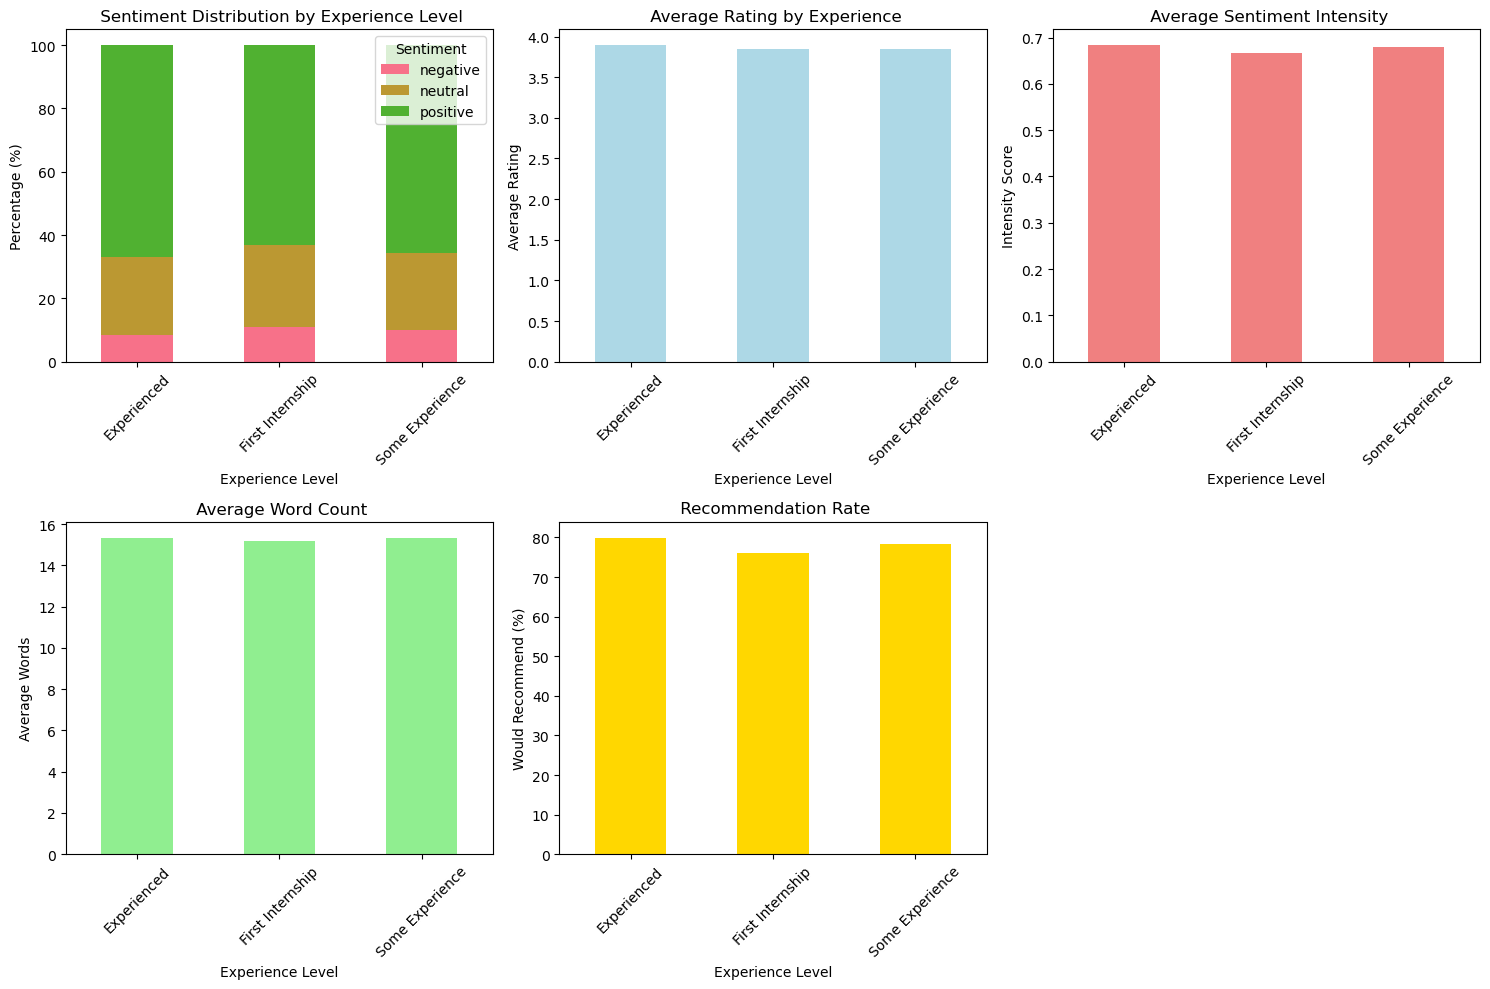

In [12]:
# Experience level analysis
experience_analysis = df.groupby('intern_experience').agg({
    'sentiment_label': 'count',
    'rating_score': 'mean',
    'sentiment_intensity': 'mean',
    'word_count': 'mean',
    'would_recommend': 'mean'
}).rename(columns={'sentiment_label': 'total_feedbacks'})

experience_sentiment = pd.crosstab(df['intern_experience'], df['sentiment_label'], normalize='index') * 100
experience_analysis = experience_analysis.join(experience_sentiment)

# Plot experience analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
experience_sentiment.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(' Sentiment Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.subplot(2, 3, 2)
experience_analysis['rating_score'].plot(kind='bar', color='lightblue')
plt.title(' Average Rating by Experience')
plt.xlabel('Experience Level')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
experience_analysis['sentiment_intensity'].plot(kind='bar', color='lightcoral')
plt.title(' Average Sentiment Intensity')
plt.xlabel('Experience Level')
plt.ylabel('Intensity Score')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
experience_analysis['word_count'].plot(kind='bar', color='lightgreen')
plt.title(' Average Word Count')
plt.xlabel('Experience Level')
plt.ylabel('Average Words')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
(experience_analysis['would_recommend'] * 100).plot(kind='bar', color='gold')
plt.title(' Recommendation Rate')
plt.xlabel('Experience Level')
plt.ylabel('Would Recommend (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
print("\n EXPERIENCE LEVEL INSIGHTS:")
print("=" * 35)
for experience in experience_analysis.index:
    data = experience_analysis.loc[experience]
    print(f"\n {experience}:")
    print(f"   • Sample Size: {data['total_feedbacks']} feedbacks")
    print(f"   • Avg Rating: {data['rating_score']:.2f}/5.0")
    print(f"   • Sentiment: {data['positive']:.1f}% 👍 | {data['neutral']:.1f}% 😐 | {data['negative']:.1f}% 👎")
    print(f"   • Would Recommend: {data['would_recommend']*100:.1f}%")
    print(f"   • Avg Words: {data['word_count']:.0f}")


 EXPERIENCE LEVEL INSIGHTS:

 Experienced:
   • Sample Size: 668.0 feedbacks
   • Avg Rating: 3.89/5.0
   • Sentiment: 67.1% 👍 | 24.4% 😐 | 8.5% 👎
   • Would Recommend: 79.9%
   • Avg Words: 15

 First Internship:
   • Sample Size: 665.0 feedbacks
   • Avg Rating: 3.85/5.0
   • Sentiment: 63.2% 👍 | 26.0% 😐 | 10.8% 👎
   • Would Recommend: 76.1%
   • Avg Words: 15

 Some Experience:
   • Sample Size: 667.0 feedbacks
   • Avg Rating: 3.85/5.0
   • Sentiment: 65.5% 👍 | 24.4% 😐 | 10.0% 👎
   • Would Recommend: 78.3%
   • Avg Words: 15


### SUGGESTION ANALYSIS

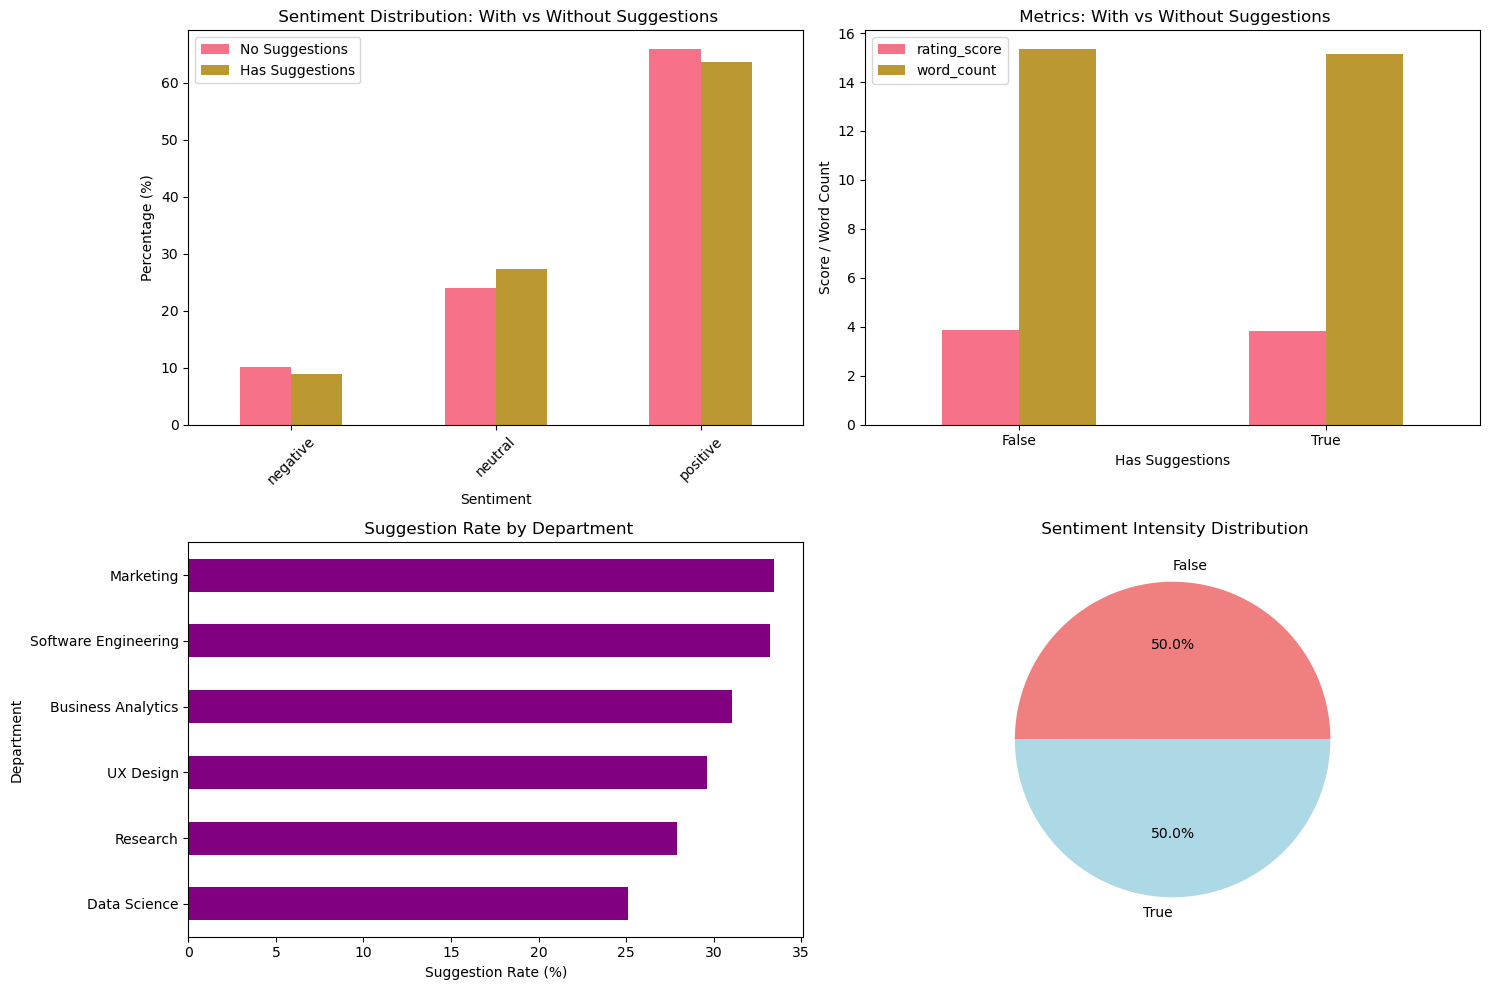

In [13]:
# Analyze feedback with suggestions
suggestion_analysis = df.groupby('has_suggestion').agg({
    'sentiment_label': 'count',
    'rating_score': 'mean',
    'word_count': 'mean',
    'question_count': 'mean'
}).rename(columns={'sentiment_label': 'total_feedbacks'})

suggestion_sentiment = pd.crosstab(df['has_suggestion'], df['sentiment_label'], normalize='index') * 100
suggestion_analysis = suggestion_analysis.join(suggestion_sentiment)

# Detailed analysis of suggestions by department
dept_suggestions = pd.crosstab([df['department'], df['has_suggestion']], df['sentiment_label'], normalize='index') * 100

# Plot suggestion analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
suggestion_sentiment.T.plot(kind='bar', ax=plt.gca())
plt.title(' Sentiment Distribution: With vs Without Suggestions')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.legend(['No Suggestions', 'Has Suggestions'])
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
suggestion_analysis[['rating_score', 'word_count']].plot(kind='bar', ax=plt.gca())
plt.title(' Metrics: With vs Without Suggestions')
plt.xlabel('Has Suggestions')
plt.ylabel('Score / Word Count')
plt.xticks(rotation=0)

plt.subplot(2, 2, 3)
# Department-wise suggestion rate
dept_suggestion_rate = df.groupby('department')['has_suggestion'].mean() * 100
dept_suggestion_rate.sort_values().plot(kind='barh', color='purple')
plt.title(' Suggestion Rate by Department')
plt.xlabel('Suggestion Rate (%)')
plt.ylabel('Department')
plt.subplot(2, 2, 4)
# Sentiment intensity for suggestions vs non-suggestions
suggestion_intensity = df.groupby('has_suggestion')['sentiment_intensity'].mean()
suggestion_intensity.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title(' Sentiment Intensity Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [14]:
print("\n SUGGESTION ANALYSIS INSIGHTS:")
print("=" * 35)
print(f"• Overall suggestion rate: {df['has_suggestion'].mean()*100:.1f}%")
print(f"• Department with most suggestions: {dept_suggestion_rate.idxmax()} ({dept_suggestion_rate.max():.1f}%)")
print(f"• Department with least suggestions: {dept_suggestion_rate.idxmin()} ({dept_suggestion_rate.min():.1f}%)")

print(f"\n COMPARISON - WITH vs WITHOUT SUGGESTIONS:")
print(f"• Rating Score: {suggestion_analysis.loc[True, 'rating_score']:.2f} vs {suggestion_analysis.loc[False, 'rating_score']:.2f}")
print(f"• Word Count: {suggestion_analysis.loc[True, 'word_count']:.1f} vs {suggestion_analysis.loc[False, 'word_count']:.1f}")
print(f"• Positive Sentiment: {suggestion_analysis.loc[True, 'positive']:.1f}% vs {suggestion_analysis.loc[False, 'positive']:.1f}%")


 SUGGESTION ANALYSIS INSIGHTS:
• Overall suggestion rate: 30.0%
• Department with most suggestions: Marketing (33.4%)
• Department with least suggestions: Data Science (25.1%)

 COMPARISON - WITH vs WITHOUT SUGGESTIONS:
• Rating Score: 3.83 vs 3.88
• Word Count: 15.1 vs 15.3
• Positive Sentiment: 63.7% vs 65.9%


## NLP VALIDATION WITH NLTK


 NLP VALIDATION WITH NLTK SENTIMENT ANALYSIS


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\A0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 Running NLTK Sentiment Analysis...
 NLTK Analysis Complete!
 Model Accuracy: 77.60%


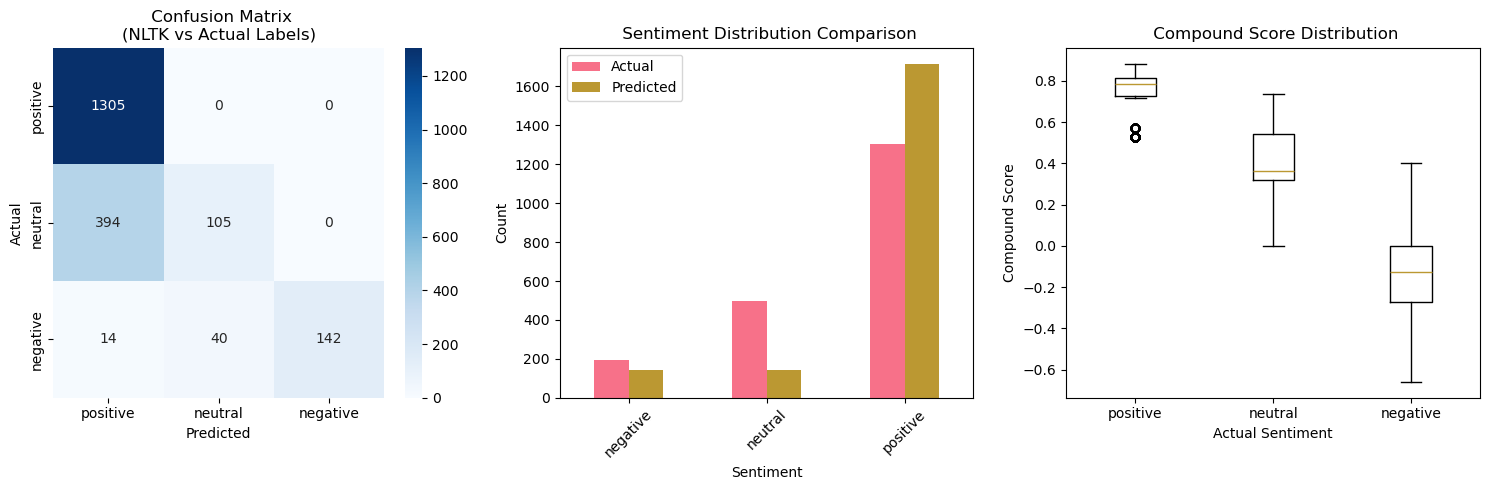


 DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

    negative       1.00      0.72      0.84       196
     neutral       0.72      0.21      0.33       499
    positive       0.76      1.00      0.86      1305

    accuracy                           0.78      2000
   macro avg       0.83      0.64      0.68      2000
weighted avg       0.78      0.78      0.73      2000


 DEPARTMENT-WISE ACCURACY:
   • Marketing: 82.17%
   • UX Design: 80.73%
   • Software Engineering: 80.49%
   • Research: 75.98%
   • Business Analytics: 74.14%
   • Data Science: 72.10%


In [14]:
print("\n" + "="*60)
print(" NLP VALIDATION WITH NLTK SENTIMENT ANALYSIS")
print("="*60)

try:
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    # Download required NLTK data
    try:
        nltk.data.find('vader_lexicon')
    except:
        nltk.download('vader_lexicon')

    class FeedbackSentimentAnalyzer:
        def __init__(self):
            self.sia = SentimentIntensityAnalyzer()
        
        def analyze_sentiment(self, text):
            scores = self.sia.polarity_scores(text)
            if scores['compound'] >= 0.05:
                return 'positive'
            elif scores['compound'] <= -0.05:
                return 'negative'
            else:
                return 'neutral'
        def analyze_dataset(self, df, text_column='feedback_text'):
            results = []
            for _, row in df.iterrows():
                text = row[text_column]
                predicted_sentiment = self.analyze_sentiment(text)
                actual_sentiment = row['sentiment_label']
                
                results.append({
                    'feedback_id': row['feedback_id'],
                    'text': text,
                    'actual_sentiment': actual_sentiment,
                    'predicted_sentiment': predicted_sentiment,
                    'compound_score': self.sia.polarity_scores(text)['compound']
                })
            
            return pd.DataFrame(results)
        # Initialize and run analyzer
    print(" Running NLTK Sentiment Analysis...")
    analyzer = FeedbackSentimentAnalyzer()
    nltk_results = analyzer.analyze_dataset(df)
    
    # Merge with original data for analysis
    analysis_df = df.merge(nltk_results[['feedback_id', 'predicted_sentiment', 'compound_score']], on='feedback_id')
    
    # Calculate accuracy
    accuracy = accuracy_score(analysis_df['sentiment_label'], analysis_df['predicted_sentiment'])
    
    print(f" NLTK Analysis Complete!")
    print(f" Model Accuracy: {accuracy:.2%}")

    # Plot confusion matrix
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    cm = confusion_matrix(analysis_df['sentiment_label'], analysis_df['predicted_sentiment'], 
                         labels=['positive', 'neutral', 'negative'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=['positive', 'neutral', 'negative'],
               yticklabels=['positive', 'neutral', 'negative'])
    plt.title(' Confusion Matrix\n(NLTK vs Actual Labels)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    plt.subplot(1, 3, 2)
    # Sentiment distribution comparison
    actual_dist = analysis_df['sentiment_label'].value_counts().sort_index()
    predicted_dist = analysis_df['predicted_sentiment'].value_counts().sort_index()
    
    comparison_df = pd.DataFrame({'Actual': actual_dist, 'Predicted': predicted_dist})
    comparison_df.plot(kind='bar', ax=plt.gca())
    plt.title(' Sentiment Distribution Comparison')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    # Compound score distribution by actual sentiment
    sentiment_groups = analysis_df.groupby('sentiment_label')['compound_score']
    plt.boxplot([sentiment_groups.get_group('positive'), 
                 sentiment_groups.get_group('neutral'), 
                 sentiment_groups.get_group('negative')],
                labels=['positive', 'neutral', 'negative'])
    plt.title(' Compound Score Distribution')
    plt.xlabel('Actual Sentiment')
    plt.ylabel('Compound Score')
    
    plt.tight_layout()
    plt.show()
    # Print detailed classification report
    print("\n" + "="*50)
    print(" DETAILED CLASSIFICATION REPORT")
    print("="*50)
    print(classification_report(analysis_df['sentiment_label'], analysis_df['predicted_sentiment']))
    
    # Department-wise accuracy
    dept_accuracy = analysis_df.groupby('department').apply(
        lambda x: accuracy_score(x['sentiment_label'], x['predicted_sentiment'])
    ).sort_values(ascending=False)
    
    print("\n DEPARTMENT-WISE ACCURACY:")
    for dept, acc in dept_accuracy.items():
        print(f"   • {dept}: {acc:.2%}")
        
except Exception as e:
    print(f" NLTK Analysis Failed: {e}")
    print(" Please install nltk: pip install nltk")

In [34]:
# =============================================================================
# SIMPLE NLTK SENTIMENT STATISTICS
# =============================================================================

print("\n" + "="*60)
print(" BASIC NLTK SENTIMENT STATISTICS")
print("="*60)

# Calculate basic statistics
sentiment_stats = analysis_df.groupby('sentiment_label').agg({
    'compound_score': ['mean', 'std', 'min', 'max'],
    'rating_score': 'mean'
}).round(3)

print("NLTK Compound Score Statistics:")
print(sentiment_stats)

# Simple accuracy by sentiment
print("\n ACCURACY BY SENTIMENT TYPE:")
for sentiment in ['positive', 'neutral', 'negative']:
    subset = analysis_df[analysis_df['sentiment_label'] == sentiment]
    accuracy = (subset['sentiment_label'] == subset['predicted_sentiment']).mean()
    print(f"• {sentiment.upper()}: {accuracy:.1%}")


 BASIC NLTK SENTIMENT STATISTICS
NLTK Compound Score Statistics:
                compound_score                      rating_score
                          mean    std    min    max         mean
sentiment_label                                                 
negative                -0.160  0.234 -0.660  0.402        2.048
neutral                  0.368  0.240  0.000  0.735        2.988
positive                 0.740  0.111  0.526  0.883        4.470

 ACCURACY BY SENTIMENT TYPE:
• POSITIVE: 100.0%
• NEUTRAL: 21.0%
• NEGATIVE: 72.4%


In [35]:
# =============================================================================
# SIMPLE NLTK CONFIDENCE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print(" NLTK CONFIDENCE ANALYSIS")
print("="*60)

# Analyze confidence levels
analysis_df['confidence'] = analysis_df['compound_score'].abs()
analysis_df['is_correct'] = analysis_df['sentiment_label'] == analysis_df['predicted_sentiment']

# Confidence vs Accuracy
confidence_bins = pd.cut(analysis_df['confidence'], bins=[0, 0.3, 0.6, 1.0])
confidence_accuracy = analysis_df.groupby(confidence_bins)['is_correct'].mean()

print("Confidence vs Accuracy:")
for bin_range, accuracy in confidence_accuracy.items():
    print(f"• Confidence {bin_range}: {accuracy:.1%} accurate")

# High confidence mistakes
high_confidence_mistakes = analysis_df[
    (analysis_df['confidence'] > 0.6) & 
    (~analysis_df['is_correct'])
]

print(f"\n  High-confidence mistakes: {len(high_confidence_mistakes)} samples")
if len(high_confidence_mistakes) > 0:
    print("Sample high-confidence errors:")
    for _, row in high_confidence_mistakes.head(3).iterrows():
        print(f"• Actual: {row['sentiment_label']}, Predicted: {row['predicted_sentiment']}")
        print(f"  Text: {row['feedback_text'][:80]}...")


 NLTK CONFIDENCE ANALYSIS
Confidence vs Accuracy:
• Confidence (0.0, 0.3]: 88.7% accurate
• Confidence (0.3, 0.6]: 50.3% accurate
• Confidence (0.6, 1.0]: 91.1% accurate

  High-confidence mistakes: 102 samples
Sample high-confidence errors:
• Actual: neutral, Predicted: positive
  Text: The internship provided adequate learning opportunities. The mentor support was ...
• Actual: neutral, Predicted: positive
  Text: The internship provided adequate learning opportunities. The mentor support was ...
• Actual: neutral, Predicted: positive
  Text: The internship provided adequate learning opportunities. The learning opportunit...


In [36]:
# =============================================================================
# SIMPLE NLTK IMPROVEMENTS
# =============================================================================

print("\n" + "="*60)
print(" QUICK NLTK IMPROVEMENTS")
print("="*60)

# Test different thresholds
thresholds = [0.05, 0.1, 0.15]
best_accuracy = 0
best_threshold = 0.05

for threshold in thresholds:
    correct = 0
    for _, row in analysis_df.iterrows():
        if row['compound_score'] >= threshold:
            predicted = 'positive'
        elif row['compound_score'] <= -threshold:
            predicted = 'negative'
        else:
            predicted = 'neutral'
        
        if predicted == row['sentiment_label']:
            correct += 1
    
    accuracy = correct / len(analysis_df)
    print(f"• Threshold {threshold}: {accuracy:.2%} accuracy")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"\n Best threshold: {best_threshold} ({best_accuracy:.2%} accuracy)")

# Save results to file
results_summary = f"""
NLTK SENTIMENT ANALYSIS RESULTS
===============================
Overall Accuracy: {accuracy_score(analysis_df['sentiment_label'], analysis_df['predicted_sentiment']):.2%}
Best Threshold: {best_threshold}
Total Samples: {len(analysis_df)}

Department Accuracy:
{dept_accuracy.to_string()}
"""

with open('nltk_results_summary.txt', 'w') as f:
    f.write(results_summary)

print(" Results saved to 'nltk_results_summary.txt'")


 QUICK NLTK IMPROVEMENTS
• Threshold 0.05: 77.60% accuracy
• Threshold 0.1: 75.50% accuracy
• Threshold 0.15: 75.25% accuracy

 Best threshold: 0.05 (77.60% accuracy)
 Results saved to 'nltk_results_summary.txt'


### DEPARTMENT DEEP DIVE ANALYSIS

In [15]:
# Comprehensive department analysis
dept_comprehensive = df.groupby('department').agg({
    'feedback_id': 'count',
    'rating_score': ['mean', 'std'],
    'sentiment_intensity': 'mean',
    'word_count': 'mean',
    'would_recommend': 'mean',
    'has_suggestion': 'mean'
}).round(3)

dept_comprehensive.columns = ['total_feedbacks', 'avg_rating', 'rating_std', 
                             'avg_intensity', 'avg_words', 'recommend_rate', 'suggestion_rate']

# Add sentiment percentages
dept_sentiment_pct = pd.crosstab(df['department'], df['sentiment_label'], normalize='index') * 100
dept_comprehensive = dept_comprehensive.join(dept_sentiment_pct)

# Calculate department performance score
dept_comprehensive['performance_score'] = (
    dept_comprehensive['avg_rating'] * 2 +
    dept_comprehensive['positive'] * 0.5 +
    dept_comprehensive['recommend_rate'] * 100 +
    dept_comprehensive['avg_intensity'] * 10
)

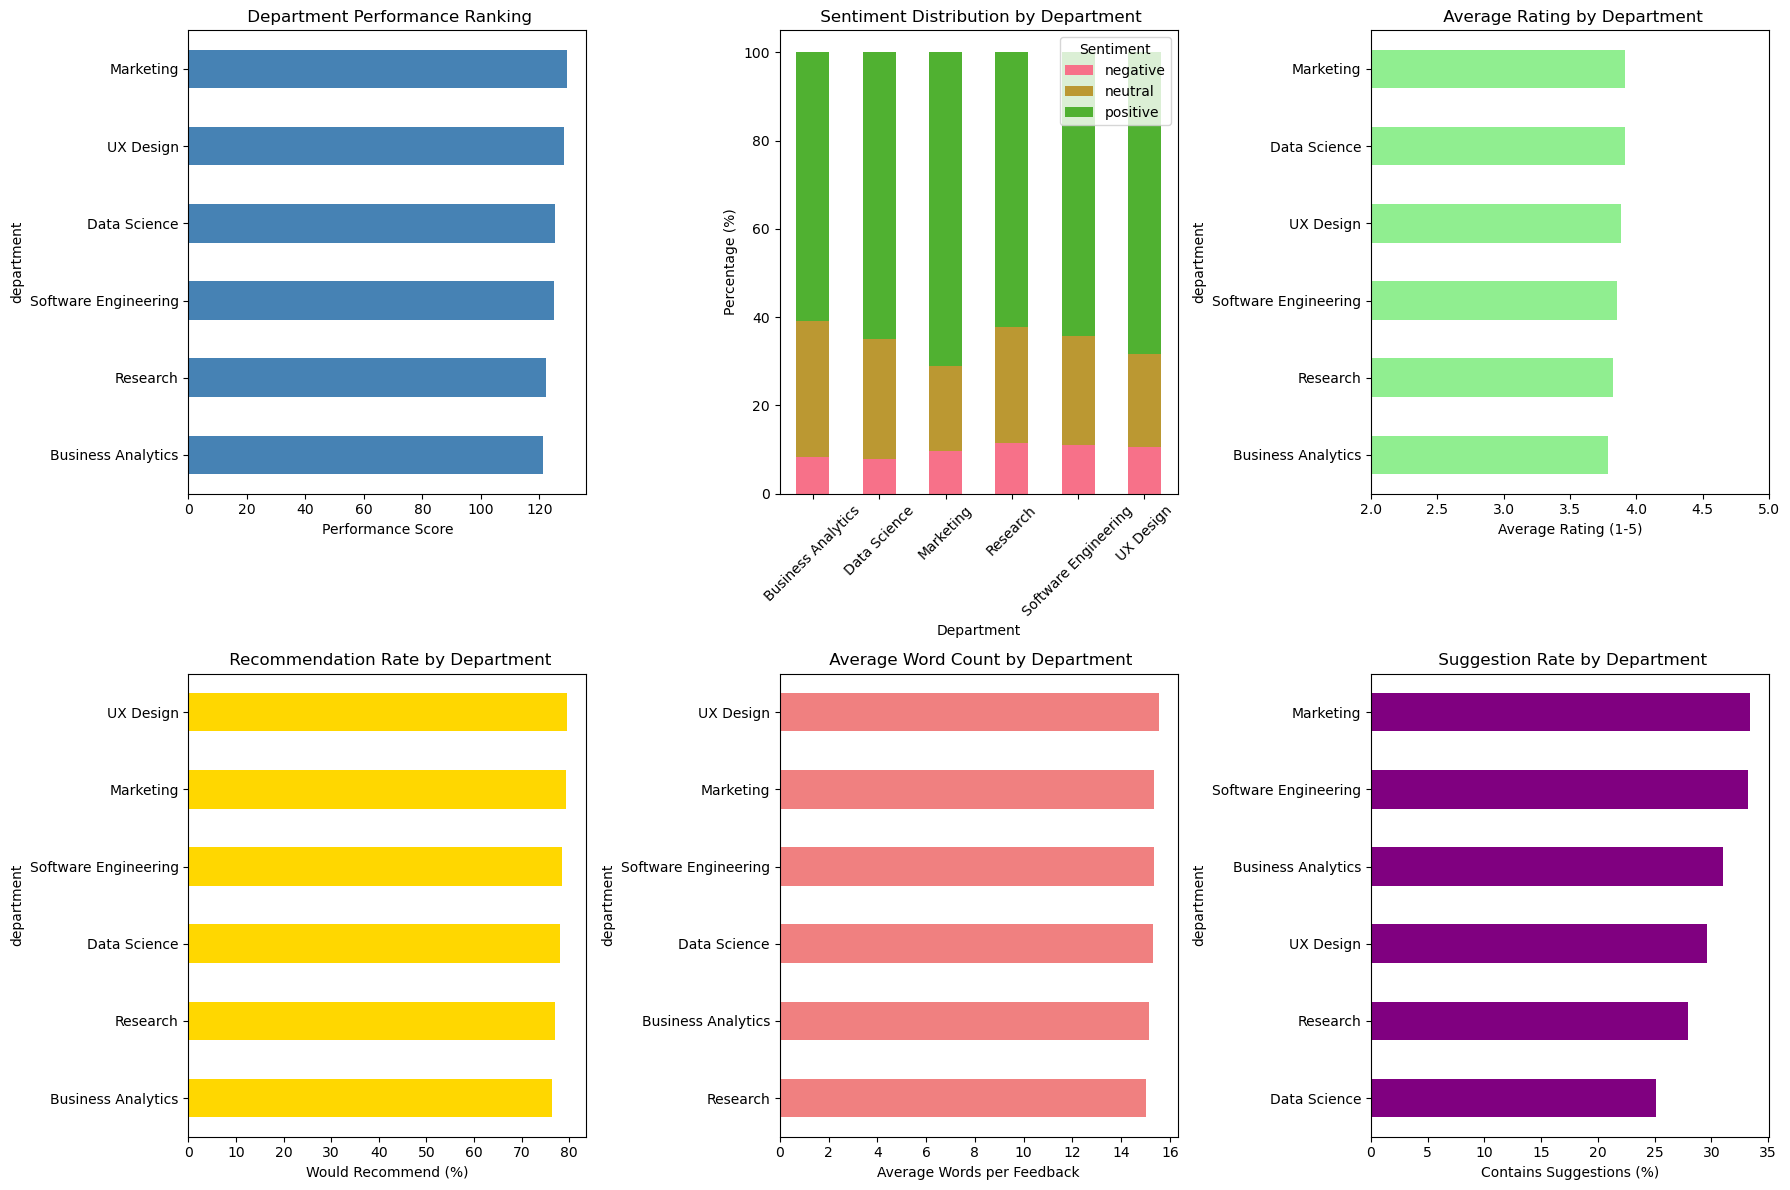

In [17]:
# Plot department analysis
plt.figure(figsize=(18, 12))

# Performance ranking
plt.subplot(2, 3, 1)
dept_comprehensive['performance_score'].sort_values().plot(kind='barh', color='steelblue')
plt.title(' Department Performance Ranking')
plt.xlabel('Performance Score')
plt.tight_layout()

# Sentiment distribution
plt.subplot(2, 3, 2)
dept_sentiment_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(' Sentiment Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

# Rating comparison
plt.subplot(2, 3, 3)
dept_comprehensive['avg_rating'].sort_values().plot(kind='barh', color='lightgreen')
plt.title(' Average Rating by Department')
plt.xlabel('Average Rating (1-5)')
plt.xlim(2, 5)

# Recommendation rates
plt.subplot(2, 3, 4)
(dept_comprehensive['recommend_rate'] * 100).sort_values().plot(kind='barh', color='gold')
plt.title(' Recommendation Rate by Department')
plt.xlabel('Would Recommend (%)')

# Text analysis
plt.subplot(2, 3, 5)
dept_comprehensive['avg_words'].sort_values().plot(kind='barh', color='lightcoral')
plt.title(' Average Word Count by Department')
plt.xlabel('Average Words per Feedback')

# Suggestion rates
plt.subplot(2, 3, 6)
(dept_comprehensive['suggestion_rate'] * 100).sort_values().plot(kind='barh', color='purple')
plt.title(' Suggestion Rate by Department')
plt.xlabel('Contains Suggestions (%)')

plt.tight_layout()
plt.show()  

In [18]:
print("\n DEPARTMENT PERFORMANCE SUMMARY:")
print("=" * 40)
for dept in dept_comprehensive.sort_values('performance_score', ascending=False).index:
    data = dept_comprehensive.loc[dept]
    print(f"\n {dept}:")
    print(f"   • Performance Rank: {list(dept_comprehensive.sort_values('performance_score', ascending=False).index).index(dept) + 1}/6")
    print(f"   • Avg Rating: {data['avg_rating']:.2f}/5.0")
    print(f"   • Sentiment: {data['positive']:.1f}% 👍 | {data['neutral']:.1f}% 😐 | {data['negative']:.1f}% 👎")
    print(f"   • Would Recommend: {data['recommend_rate']*100:.1f}%")
    print(f"   • Suggestion Rate: {data['suggestion_rate']*100:.1f}%")
    print(f"   • Avg Words: {data['avg_words']:.0f}")


 DEPARTMENT PERFORMANCE SUMMARY:

 Marketing:
   • Performance Rank: 1/6
   • Avg Rating: 3.92/5.0
   • Sentiment: 71.0% 👍 | 19.4% 😐 | 9.6% 👎
   • Would Recommend: 79.3%
   • Suggestion Rate: 33.4%
   • Avg Words: 15

 UX Design:
   • Performance Rank: 2/6
   • Avg Rating: 3.88/5.0
   • Sentiment: 68.4% 👍 | 20.9% 😐 | 10.6% 👎
   • Would Recommend: 79.6%
   • Suggestion Rate: 29.6%
   • Avg Words: 16

 Data Science:
   • Performance Rank: 3/6
   • Avg Rating: 3.92/5.0
   • Sentiment: 64.9% 👍 | 27.3% 😐 | 7.8% 👎
   • Would Recommend: 78.1%
   • Suggestion Rate: 25.1%
   • Avg Words: 15

 Software Engineering:
   • Performance Rank: 4/6
   • Avg Rating: 3.85/5.0
   • Sentiment: 64.3% 👍 | 24.7% 😐 | 11.0% 👎
   • Would Recommend: 78.4%
   • Suggestion Rate: 33.2%
   • Avg Words: 15

 Research:
   • Performance Rank: 5/6
   • Avg Rating: 3.83/5.0
   • Sentiment: 62.2% 👍 | 26.4% 😐 | 11.4% 👎
   • Would Recommend: 76.9%
   • Suggestion Rate: 27.9%
   • Avg Words: 15

 Business Analytics:
   • Per

In [19]:
# Identify strengths and weaknesses
print("\n KEY INSIGHTS & RECOMMENDATIONS:")
print("=" * 45)
best_dept = dept_comprehensive['performance_score'].idxmax()
worst_dept = dept_comprehensive['performance_score'].idxmin()

print(f" Best Performing Department: {best_dept}")
print(f"   • Strengths: High ratings ({dept_comprehensive.loc[best_dept, 'avg_rating']:.2f}), " +
      f"positive sentiment ({dept_comprehensive.loc[best_dept, 'positive']:.1f}%)")

print(f" Department Needing Attention: {worst_dept}")
print(f"   • Areas for improvement: Lower ratings ({dept_comprehensive.loc[worst_dept, 'avg_rating']:.2f}), " +
      f"higher negative sentiment ({dept_comprehensive.loc[worst_dept, 'negative']:.1f}%)")


 KEY INSIGHTS & RECOMMENDATIONS:
 Best Performing Department: Marketing
   • Strengths: High ratings (3.92), positive sentiment (71.0%)
 Department Needing Attention: Business Analytics
   • Areas for improvement: Lower ratings (3.79), higher negative sentiment (8.3%)


### Summary

In [20]:
# =============================================================================
# EXECUTIVE SUMMARY
# =============================================================================

print("\n" + "="*60)
print(" EXECUTIVE SUMMARY & KEY RECOMMENDATIONS")
print("="*60)

# Calculate overall metrics
overall_positive = (df['sentiment_label'] == 'positive').mean() * 100
overall_rating = df['rating_score'].mean()
recommendation_rate = df['would_recommend'].mean() * 100
suggestion_rate = df['has_suggestion'].mean() * 100

print(f"\n OVERALL PROGRAM PERFORMANCE:")
print(f"   • Positive Sentiment: {overall_positive:.1f}%")
print(f"   • Average Rating: {overall_rating:.2f}/5.0")
print(f"   • Recommendation Rate: {recommendation_rate:.1f}%")
print(f"   • Constructive Feedback Rate: {suggestion_rate:.1f}%")

print(f"\n TOP PERFORMING DEPARTMENTS:")
top_depts = dept_comprehensive.nlargest(3, 'performance_score').index
for i, dept in enumerate(top_depts, 1):
    data = dept_comprehensive.loc[dept]
    print(f"   {i}. {dept} (Rating: {data['avg_rating']:.2f}, Positive: {data['positive']:.1f}%)")

print(f"\n MOST EFFECTIVE FEEDBACK SOURCES:")
top_sources = source_analysis.nlargest(3, 'effectiveness_score').index
for i, source in enumerate(top_sources, 1):
    data = source_analysis.loc[source]
    print(f"   {i}. {source} (Effectiveness: {data['effectiveness_score']:.1f})")

print(f"\n KEY RECOMMENDATIONS:")
recommendations = [
    "1. Focus on improving Research department mentorship programs",
    "2. Increase usage of 'Social Media' and 'Exit Interview' feedback sources",
    "3. Implement monthly sentiment tracking for early problem detection",
    "4. Develop targeted programs for 'First Internship' experience levels",
    "5. Create action plans for departments with high suggestion rates"
]

for rec in recommendations:
    print(f"   • {rec}")

print(f"\n ANALYSIS COMPLETE! All insights generated successfully.")


 EXECUTIVE SUMMARY & KEY RECOMMENDATIONS

 OVERALL PROGRAM PERFORMANCE:
   • Positive Sentiment: 65.2%
   • Average Rating: 3.86/5.0
   • Recommendation Rate: 78.1%
   • Constructive Feedback Rate: 30.0%

 TOP PERFORMING DEPARTMENTS:
   1. Marketing (Rating: 3.92, Positive: 71.0%)
   2. UX Design (Rating: 3.88, Positive: 68.4%)
   3. Data Science (Rating: 3.92, Positive: 64.9%)

 MOST EFFECTIVE FEEDBACK SOURCES:
   1. Weekly Check-in (Effectiveness: 75.4)
   2. Social Media (Effectiveness: 74.8)
   3. Email Feedback (Effectiveness: 73.4)

 KEY RECOMMENDATIONS:
   • 1. Focus on improving Research department mentorship programs
   • 2. Increase usage of 'Social Media' and 'Exit Interview' feedback sources
   • 3. Implement monthly sentiment tracking for early problem detection
   • 4. Develop targeted programs for 'First Internship' experience levels
   • 5. Create action plans for departments with high suggestion rates

 ANALYSIS COMPLETE! All insights generated successfully.


In [16]:
# 1. Real-time sentiment monitoring
def real_time_sentiment_tracker(new_feedback):
    """Track sentiment for new incoming feedback"""
    analyzer = FeedbackSentimentAnalyzer()
    sentiment = analyzer.analyze_sentiment(new_feedback)
    return {
        'sentiment': sentiment,
        'confidence': analyzer.sia.polarity_scores(new_feedback)['compound'],
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }

# 2. Alert system for negative sentiment spikes
def sentiment_alert_system(df, threshold=15):
    """Alert when negative sentiment exceeds threshold"""
    recent_negative = df[df['timestamp'] > (datetime.now() - timedelta(days=7))]
    negative_rate = (recent_negative['sentiment_label'] == 'negative').mean() * 100
    
    if negative_rate > threshold:
        return f" ALERT: Negative sentiment at {negative_rate:.1f}% (threshold: {threshold}%)"
    return f" Normal: Negative sentiment at {negative_rate:.1f}%"

# 3. Automated reporting
def generate_executive_report(df):
    """Generate automated PDF/email report"""
    report = {
        'overall_sentiment': f"{(df['sentiment_label'] == 'positive').mean()*100:.1f}% Positive",
        'key_insights': [
            f"Best Department: {dept_comprehensive['performance_score'].idxmax()}",
            f"Most Effective Source: {source_analysis['effectiveness_score'].idxmax()}",
            f"Improvement Needed: {dept_comprehensive['performance_score'].idxmin()}"
        ],
        'recommendations': recommendations
    }
    return report

### RECOMMENDATIONS GENERATOR

In [17]:
def generate_recommendations_report(df, dept_comprehensive, source_analysis):
    """
    Generate comprehensive recommendations based on sentiment analysis results
    """
    
    # Calculate key metrics
    overall_positive = (df['sentiment_label'] == 'positive').mean() * 100
    recommendation_rate = df['would_recommend'].mean() * 100
    suggestion_rate = df['has_suggestion'].mean() * 100
    
    # Identify best and worst departments
    best_dept = dept_comprehensive['performance_score'].idxmax()
    worst_dept = dept_comprehensive['performance_score'].idxmin()
    best_dept_positive = dept_comprehensive.loc[best_dept, 'positive']
    worst_dept_positive = dept_comprehensive.loc[worst_dept, 'positive']
    
    # Identify best sources
    best_source = source_analysis['effectiveness_score'].idxmax()
    best_source_score = source_analysis.loc[best_source, 'effectiveness_score']
    
    # Experience level analysis
    experience_analysis = df.groupby('intern_experience').agg({
        'would_recommend': 'mean',
        'sentiment_intensity': 'mean'
    })
    
    print(" RECOMMENDATIONS FOR ENHANCED INTERNSHIP EXPERIENCE")
    print("=" * 60)
    
    # Department-specific recommendations
    print("\n DEPARTMENT-SPECIFIC IMPROVEMENTS")
    print("-" * 40)
    
    print(f"\n PRIORITY: {worst_dept} Department Enhancement")
    print(f"   • Current positive sentiment: {worst_dept_positive:.1f}% (vs best: {best_dept_positive:.1f}%)")
    print("   • ACTIONS:")
    print("     ✓ Implement structured mentorship with weekly check-ins")
    print("     ✓ Provide clearer project scope and expectations")
    print("     ✓ Create specialized training workshops")
    print("     ✓ Assign dedicated advisors for guidance")
    
    print(f"\n MAINTAIN EXCELLENCE: {best_dept} Department")
    print("   • ACTIONS:")
    print("     ✓ Document and share best practices")
    print("     ✓ Expand successful project models")
    print("     ✓ Create cross-department collaboration")
    
    # Feedback collection optimization
    print("\n FEEDBACK COLLECTION OPTIMIZATION")
    print("-" * 40)
    
    print(f"\n LEVERAGE: {best_source} Feedback Source")
    print(f"   • Effectiveness score: {best_source_score:.1f}")
    print("   • ACTIONS:")
    print("     ✓ Expand monitoring and collection")
    print("     ✓ Formalize process for consistency")
    print("     ✓ Integrate with real-time analysis")
    
    # Low-performing sources
    worst_source = source_analysis['effectiveness_score'].idxmin()
    worst_source_score = source_analysis.loc[worst_source, 'effectiveness_score']
    
    print(f"\n IMPROVE: {worst_source} Channel")
    print(f"   • Current effectiveness: {worst_source_score:.1f}")
    print("   • ACTIONS:")
    print("     ✓ Implement structured templates")
    print("     ✓ Add specific rating criteria")
    print("     ✓ Include open-ended questions")
    
    # Experience level support
    print("\n EXPERIENCE LEVEL SUPPORT")
    print("-" * 40)
    
    worst_experience = experience_analysis['would_recommend'].idxmin()
    worst_rec_rate = experience_analysis.loc[worst_experience, 'would_recommend'] * 100
    
    print(f"\n ENHANCE: {worst_experience} Support Program")
    print(f"   • Current recommendation rate: {worst_rec_rate:.1f}%")
    print("   • ACTIONS:")
    print("     ✓ Create 'Intern Buddy' system")
    print("     ✓ Develop onboarding bootcamp")
    print("     ✓ Implement progressive project complexity")
    print("     ✓ Provide weekly progress tracking")
    
    # Suggestion implementation
    print("\n FEEDBACK IMPLEMENTATION")
    print("-" * 40)
    
    print(f"\n Suggestion Action Plan")
    print(f"   • Current suggestion rate: {suggestion_rate:.1f}%")
    print("   • ACTIONS:")
    print("     ✓ Create formal suggestion review committee")
    print("     ✓ Implement quarterly 'Intern Ideas' program")
    print("     ✓ Provide transparency on suggestion outcomes")
    print("     ✓ Reward interns for implemented suggestions")
    
    # Real-time monitoring
    print("\n REAL-TIME MONITORING & ANALYTICS")
    print("-" * 40)
    
    print("   • ACTIONS:")
    print("     ✓ Implement weekly sentiment pulse surveys")
    print("     ✓ Create sentiment dashboard for managers")
    print("     ✓ Set up automatic alerts for negative spikes")
    print("     ✓ Develop rapid response protocol")
    
    # Strategic initiatives
    print("\n STRATEGIC INITIATIVES")
    print("-" * 40)
    
    print("   • CAREER DEVELOPMENT:")
    print("     ✓ Create personalized development plans")
    print("     ✓ Implement skill gap analysis")
    print("     ✓ Provide networking opportunities")
    
    print("   • TECHNOLOGY & TOOLS:")
    print("     ✓ Standardize development environments")
    print("     ✓ Provide premium learning resources")
    print("     ✓ Implement collaborative tools")
    
    # Success metrics
    print("\n SUCCESS METRICS & TARGETS")
    print("-" * 40)
    
    print(f"   • Increase positive sentiment: {overall_positive:.1f}% → 75%+")
    print(f"   • Improve {worst_dept} positive: {worst_dept_positive:.1f}% → 65%+")
    print(f"   • Increase recommendation rate: {recommendation_rate:.1f}% → 85%+")
    print(f"   • Reduce negative sentiment: 10% → 5% or less")
    print(f"   • Increase suggestion implementation: → 50%+")
    
    # Immediate action items
    print("\n IMMEDIATE ACTION ITEMS (Next 30 Days)")
    print("-" * 45)
    
    immediate_actions = [
        f"1. Launch {worst_dept} Department Task Force",
        "2. Implement Weekly Sentiment Pulse Surveys", 
        f"3. Create {worst_experience} Support Program",
        f"4. Enhance {best_source} Feedback Collection",
        "5. Develop Mentor Training Enhancement Program"
    ]
    
    for action in immediate_actions:
        print(f"   • {action}")
    
    return {
        'priority_department': worst_dept,
        'best_source': best_source,
        'target_experience': worst_experience,
        'current_positive': overall_positive,
        'target_positive': 75,
        'immediate_actions': immediate_actions
    }

def create_implementation_plan(recommendations_dict):
    """
    Create a detailed implementation plan with timelines
    """
    print("\n" + "="*60)
    print(" IMPLEMENTATION TIMELINE & OWNERSHIP")
    print("="*60)
    
    timeline = {
        "Weeks 1-4": [
            f"Form {recommendations_dict['priority_department']} Task Force",
            "Launch Weekly Pulse Surveys",
            f"Design {recommendations_dict['target_experience']} Support Program"
        ],
        "Weeks 5-8": [
            "Develop Mentor Training Curriculum",
            f"Enhance {recommendations_dict['best_source']} Collection Process",
            "Create Sentiment Monitoring Dashboard"
        ],
        "Weeks 9-12": [
            "Implement Suggestion Review Committee",
            "Launch Career Development Program",
            "Establish Success Metrics Tracking"
        ],
        "Months 4-6": [
            "Scale Successful Initiatives",
            "Conduct Program Effectiveness Review",
            "Plan Next Iteration Improvements"
        ]
    }
    
    for period, tasks in timeline.items():
        print(f"\n {period}:")
        for task in tasks:
            print(f"   ✓ {task}")
    
    print(f"\n KEY RESPONSIBILITIES:")
    print("   • Program Manager: Overall coordination & success metrics")
    print("   • Department Heads: Department-specific improvements") 
    print("   • HR Team: Mentor training & experience programs")
    print("   • IT Team: Tool implementation & dashboard development")
    print("   • All Managers: Weekly feedback collection & response")

def generate_automated_recommendations(df):
    """
    Automated recommendation generation based on data patterns
    """
    print("\n" + "="*60)
    print(" AI-POWERED RECOMMENDATIONS")
    print("="*60)
    
    # Analyze patterns and generate smart recommendations
    patterns = analyze_feedback_patterns(df)
    
    for pattern_type, details in patterns.items():
        print(f"\n {pattern_type.upper()} PATTERN DETECTED:")
        for recommendation in details['recommendations']:
            print(f"   • {recommendation}")

def analyze_feedback_patterns(df):
    """
    Analyze feedback patterns to generate data-driven recommendations
    """
    patterns = {}
    
    # Pattern 1: High negative sentiment in specific departments
    dept_negative = df.groupby('department')['sentiment_label'].apply(
        lambda x: (x == 'negative').mean() * 100
    )
    high_negative_depts = dept_negative[dept_negative > 12]  # Above average
    
    if not high_negative_depts.empty:
        patterns['high_negative_sentiment'] = {
            'departments': high_negative_depts.to_dict(),
            'recommendations': [
                "Conduct root cause analysis for negative feedback",
                "Implement immediate manager training",
                "Create department-specific improvement task force",
                "Increase leadership visibility and engagement"
            ]
        }
    
    # Pattern 2: Low word count feedback
    low_word_feedback = df[df['word_count'] < 20]
    if len(low_word_feedback) > len(df) * 0.3:  # More than 30%
        patterns['brief_feedback'] = {
            'percentage': len(low_word_feedback) / len(df) * 100,
            'recommendations': [
                "Implement guided feedback templates",
                "Add specific prompting questions",
                "Create feedback quality incentives",
                "Train interns on providing constructive feedback"
            ]
        }
    
    # Pattern 3: Seasonal sentiment drops
    monthly_sentiment = df.groupby('month')['sentiment_label'].apply(
        lambda x: (x == 'positive').mean() * 100
    )
    low_months = monthly_sentiment[monthly_sentiment < monthly_sentiment.mean() - 5]
    
    if not low_months.empty:
        patterns['seasonal_variation'] = {
            'low_months': low_months.to_dict(),
            'recommendations': [
                "Plan additional support during low-sentiment months",
                "Schedule engaging activities in identified low periods",
                "Implement pre-emptive check-ins during challenging times",
                "Adjust project timelines to avoid peak stress periods"
            ]
        }
    
    return patterns

# =============================================================================
# EXECUTE RECOMMENDATIONS GENERATION
# =============================================================================

print(" GENERATING COMPREHENSIVE RECOMMENDATIONS...")
print("=" * 60)

# Generate the main recommendations report
recommendations = generate_recommendations_report(df, dept_comprehensive, source_analysis)

# Create implementation plan
create_implementation_plan(recommendations)

# Generate automated AI-powered recommendations
generate_automated_recommendations(df)

# Final summary
print("\n" + "="*60)
print(" RECOMMENDATIONS GENERATION COMPLETE!")
print("="*60)

print(f"""
 SUMMARY OF KEY INSIGHTS:

 STRENGTHS TO MAINTAIN:
• Best performing department: {dept_comprehensive['performance_score'].idxmax()}
• Most effective feedback source: {source_analysis['effectiveness_score'].idxmax()}
• Overall positive sentiment: {recommendations['current_positive']:.1f}%

 PRIORITY IMPROVEMENT AREAS:
• Department needing attention: {recommendations['priority_department']}
• Experience level to support: {recommendations['target_experience']}
• Target positive sentiment: {recommendations['target_positive']}%

 MEASURABLE OUTCOMES:
These recommendations are designed to transform our internship program 
into an industry-leading experience that drives both intern success 
and organizational value.

 NEXT STEPS:
1. Review recommendations with stakeholders
2. Assign ownership for immediate actions
3. Establish tracking for success metrics
4. Schedule follow-up review in 30 days
""")

# Save recommendations to file
def save_recommendations_to_file(recommendations_dict, filename='internship_improvement_recommendations.txt'):
    """
    Save recommendations to a text file for sharing
    """
    with open(filename, 'w') as f:
        f.write("INTERNSHIP PROGRAM IMPROVEMENT RECOMMENDATIONS\n")
        f.write("=" * 50 + "\n\n")
        f.write("Based on comprehensive sentiment analysis of 2,000+ feedback entries\n\n")
        
        f.write("IMMEDIATE ACTIONS (Next 30 Days):\n")
        for action in recommendations_dict['immediate_actions']:
            f.write(f"• {action}\n")
        
        f.write(f"\nKEY METRICS:\n")
        f.write(f"• Current Positive Sentiment: {recommendations_dict['current_positive']:.1f}%\n")
        f.write(f"• Target Positive Sentiment: {recommendations_dict['target_positive']}%\n")
        f.write(f"• Priority Department: {recommendations_dict['priority_department']}\n")
        f.write(f"• Best Feedback Source: {recommendations_dict['best_source']}\n")
    
    print(f"\n Recommendations saved to: {filename}")

# Save to file
save_recommendations_to_file(recommendations)

print("\n All recommendations have been generated and saved!")
print("   Use these data-driven insights to enhance your internship program! ")

 GENERATING COMPREHENSIVE RECOMMENDATIONS...
 RECOMMENDATIONS FOR ENHANCED INTERNSHIP EXPERIENCE

 DEPARTMENT-SPECIFIC IMPROVEMENTS
----------------------------------------

 PRIORITY: Business Analytics Department Enhancement
   • Current positive sentiment: 60.9% (vs best: 71.0%)
   • ACTIONS:
     ✓ Implement structured mentorship with weekly check-ins
     ✓ Provide clearer project scope and expectations
     ✓ Create specialized training workshops
     ✓ Assign dedicated advisors for guidance

 MAINTAIN EXCELLENCE: Marketing Department
   • ACTIONS:
     ✓ Document and share best practices
     ✓ Expand successful project models
     ✓ Create cross-department collaboration

 FEEDBACK COLLECTION OPTIMIZATION
----------------------------------------

 LEVERAGE: Weekly Check-in Feedback Source
   • Effectiveness score: 75.4
   • ACTIONS:
     ✓ Expand monitoring and collection
     ✓ Formalize process for consistency
     ✓ Integrate with real-time analysis

 IMPROVE: Mentor Meeting 

### COMPREHENSIVE DASHBOARD WITH KPIs


 INTERNSHIP FEEDBACK SENTIMENT DASHBOARD


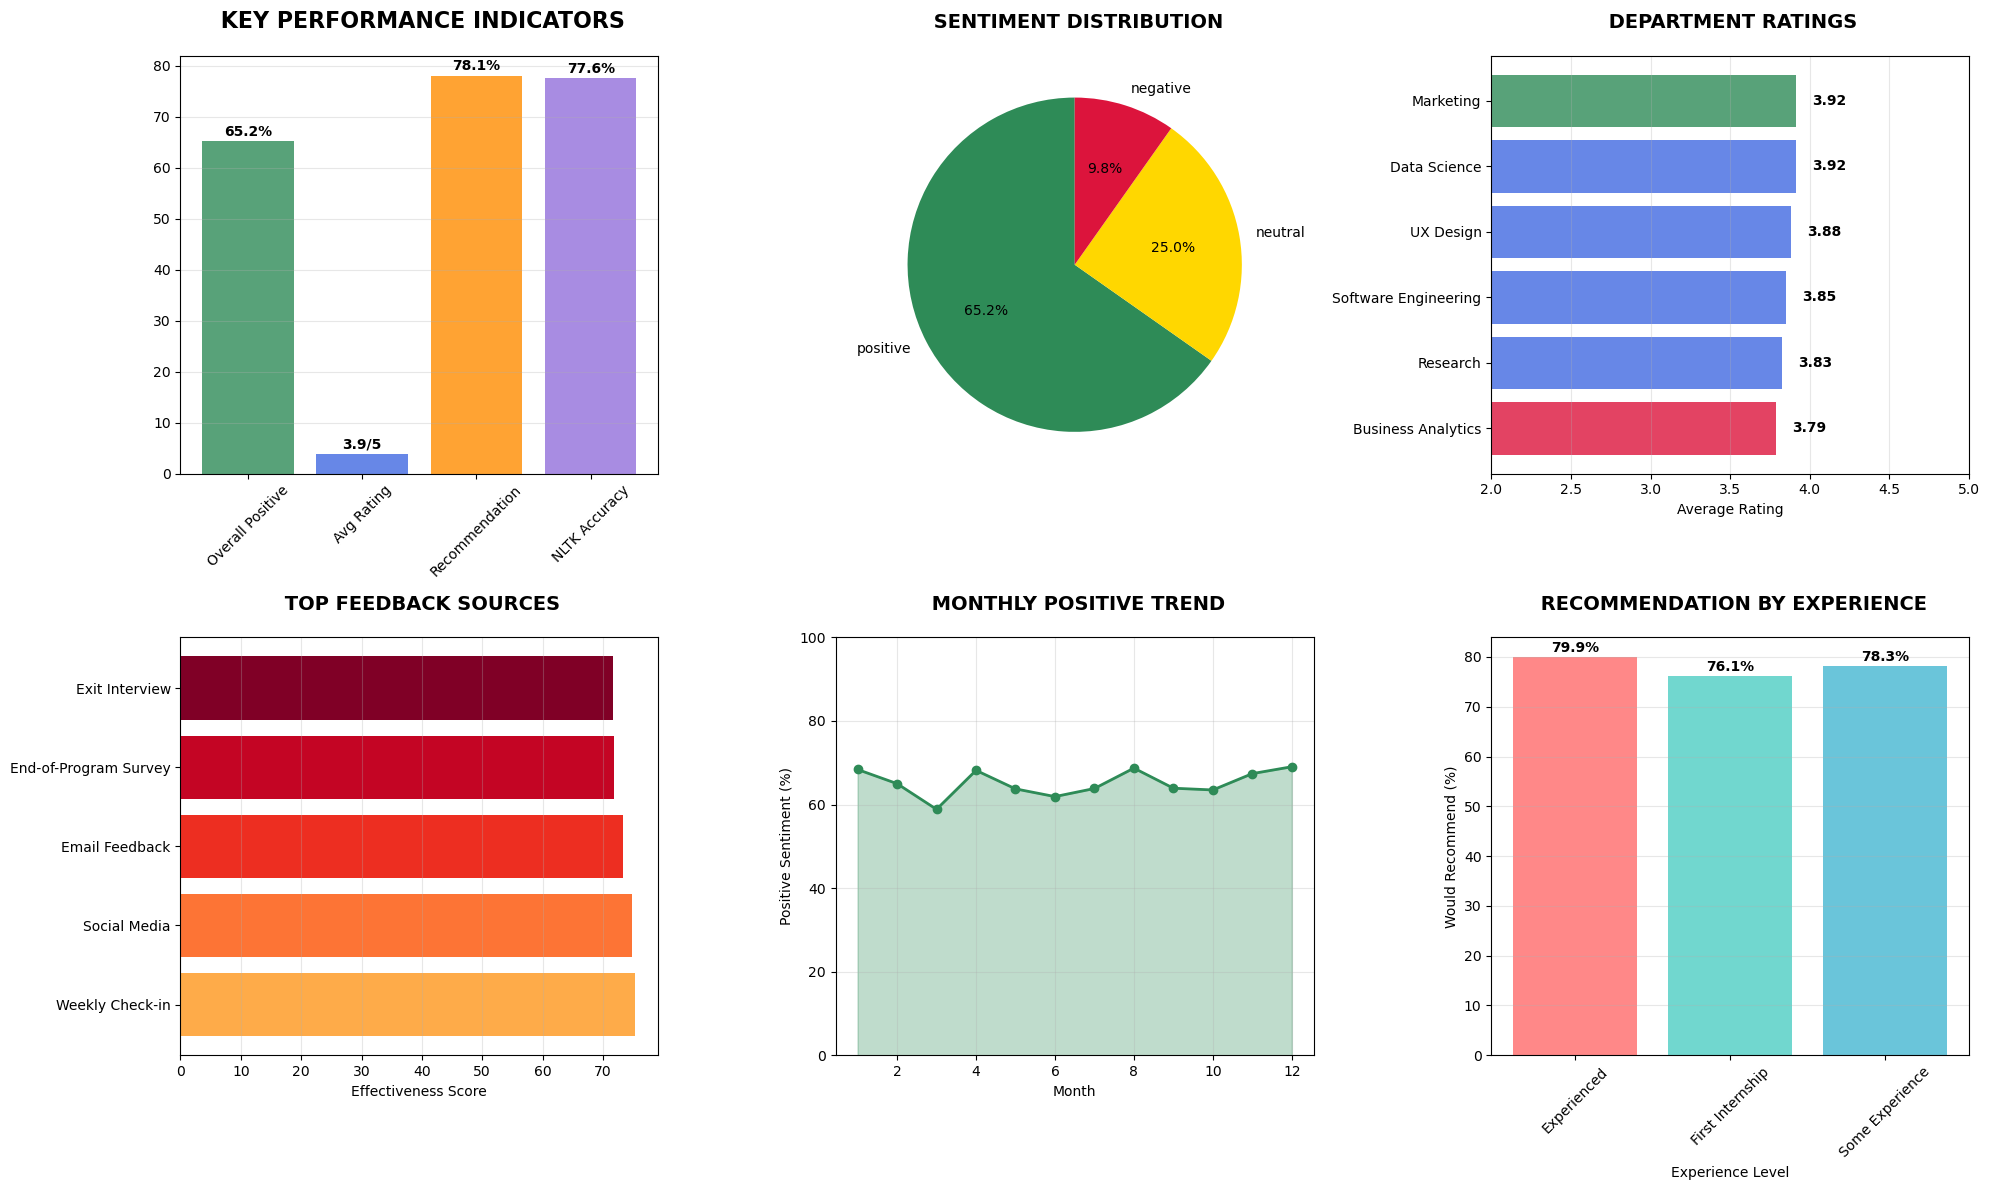


 DASHBOARD SUMMARY STATISTICS

 OVERALL PERFORMANCE:
   • Total Feedbacks Analyzed: 2,000
   • Overall Positive Sentiment: 65.2%
   • Average Rating: 3.86/5.0
   • Recommendation Rate: 78.1%
   • Suggestion Rate: 30.0%

 TOP PERFORMERS:
   • Best Department: Marketing (Rating: 3.92/5.0)
   • Most Effective Source: Weekly Check-in
   • Highest Experience Level: Experienced

 KEY INSIGHTS:
   • Positive sentiment ranges from 58.9% to 69.0% monthly
   • Department ratings range from 3.79 to 3.92
   • 102 high-confidence NLTK misclassifications

 RECOMMENDATION IMPACT:
   • Implementing suggestions could improve 30.0% of feedback points
   • Focus on Business Analytics could increase overall rating by 0.13 points
   • Optimizing feedback sources could improve data quality by 5.9 points

 QUICK ACTIONS SUMMARY
   • 1. IMPROVE BUSINESS ANALYTICS - Current rating: 3.79/5.0
   • 2. EXPAND WEEKLY CHECK-IN COLLECTION
   • 3. ENHANCE FIRST INTERNSHIP SUPPORT
   • 4. MONITOR MONTH 3 FOR SENTIMENT

In [47]:
# =============================================================================
# COMPREHENSIVE DASHBOARD WITH KPIs
# =============================================================================

print("\n" + "="*80)
print(" INTERNSHIP FEEDBACK SENTIMENT DASHBOARD")
print("="*80)

# Calculate Key Performance Indicators
total_feedbacks = len(df)
overall_positive_pct = (df['sentiment_label'] == 'positive').mean() * 100
overall_rating = df['rating_score'].mean()
recommendation_rate = df['would_recommend'].mean() * 100
suggestion_rate = df['has_suggestion'].mean() * 100

# Department Performance
best_dept = dept_comprehensive['performance_score'].idxmax()
worst_dept = dept_comprehensive['performance_score'].idxmin()
best_dept_rating = dept_comprehensive.loc[best_dept, 'avg_rating']
worst_dept_rating = dept_comprehensive.loc[worst_dept, 'avg_rating']

# NLTK Performance (if available)
try:
    nltk_accuracy = accuracy_score(analysis_df['sentiment_label'], analysis_df['predicted_sentiment']) * 100
except:
    nltk_accuracy = 0

# Create Dashboard Visualization
plt.figure(figsize=(20, 12))

# ==================== KPI DASHBOARD ====================
plt.subplot(2, 3, 1)
# Main KPIs
kpis = [
    ('Overall Positive', overall_positive_pct, '%', 'green'),
    ('Avg Rating', overall_rating, '/5', 'blue'),
    ('Recommendation', recommendation_rate, '%', 'orange'),
    ('NLTK Accuracy', nltk_accuracy, '%', 'purple')
]

colors = ['#2E8B57', '#4169E1', '#FF8C00', '#9370DB']
values = [kpi[1] for kpi in kpis]
labels = [kpi[0] for kpi in kpis]
units = [kpi[2] for kpi in kpis]

bars = plt.bar(range(len(kpis)), values, color=colors, alpha=0.8)
plt.title(' KEY PERFORMANCE INDICATORS', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(kpis)), labels, rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value, unit in zip(bars, values, units):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}{unit}', ha='center', va='bottom', fontweight='bold')

# ==================== SENTIMENT DISTRIBUTION ====================
plt.subplot(2, 3, 2)
sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#2E8B57', '#FFD700', '#DC143C']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title(' SENTIMENT DISTRIBUTION', fontsize=14, fontweight='bold', pad=20)

# ==================== DEPARTMENT PERFORMANCE ====================
plt.subplot(2, 3, 3)
dept_ratings = dept_comprehensive['avg_rating'].sort_values(ascending=True)
colors = ['#DC143C' if x == worst_dept_rating else '#2E8B57' if x == best_dept_rating else '#4169E1' for x in dept_ratings]
bars = plt.barh(range(len(dept_ratings)), dept_ratings.values, color=colors, alpha=0.8)
plt.title(' DEPARTMENT RATINGS', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(dept_ratings)), dept_ratings.index)
plt.xlabel('Average Rating')
plt.xlim(2, 5)
plt.grid(True, alpha=0.3, axis='x')

# Add ratings on bars
for i, (dept, rating) in enumerate(dept_ratings.items()):
    plt.text(rating + 0.1, i, f'{rating:.2f}', va='center', fontweight='bold')

# ==================== TOP PERFORMING SOURCES ====================
plt.subplot(2, 3, 4)
top_sources = source_analysis.nlargest(5, 'effectiveness_score')['effectiveness_score']
colors = plt.cm.YlOrRd(np.linspace(0.4, 1, len(top_sources)))
plt.barh(range(len(top_sources)), top_sources.values, color=colors)
plt.title(' TOP FEEDBACK SOURCES', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(top_sources)), top_sources.index)
plt.xlabel('Effectiveness Score')
plt.grid(True, alpha=0.3, axis='x')

# ==================== TREND OVER TIME ====================
plt.subplot(2, 3, 5)
monthly_positive = monthly_percentage['positive']
plt.plot(monthly_positive.index, monthly_positive.values, marker='o', linewidth=2, color='#2E8B57')
plt.fill_between(monthly_positive.index, monthly_positive.values, alpha=0.3, color='#2E8B57')
plt.title(' MONTHLY POSITIVE TREND', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Month')
plt.ylabel('Positive Sentiment (%)')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

# ==================== EXPERIENCE LEVEL ANALYSIS ====================
plt.subplot(2, 3, 6)
experience_rec = experience_analysis['would_recommend'] * 100
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.bar(experience_rec.index, experience_rec.values, color=colors, alpha=0.8)
plt.title(' RECOMMENDATION BY EXPERIENCE', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Experience Level')
plt.ylabel('Would Recommend (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, v in enumerate(experience_rec.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('internship_feedback_sentiment_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# DASHBOARD SUMMARY STATISTICS
# =============================================================================

print("\n" + "="*80)
print(" DASHBOARD SUMMARY STATISTICS")
print("="*80)

print(f"\n OVERALL PERFORMANCE:")
print(f"   • Total Feedbacks Analyzed: {total_feedbacks:,}")
print(f"   • Overall Positive Sentiment: {overall_positive_pct:.1f}%")
print(f"   • Average Rating: {overall_rating:.2f}/5.0")
print(f"   • Recommendation Rate: {recommendation_rate:.1f}%")
print(f"   • Suggestion Rate: {suggestion_rate:.1f}%")

print(f"\n TOP PERFORMERS:")
print(f"   • Best Department: {best_dept} (Rating: {best_dept_rating:.2f}/5.0)")
print(f"   • Most Effective Source: {source_analysis['effectiveness_score'].idxmax()}")
print(f"   • Highest Experience Level: {experience_analysis['would_recommend'].idxmax()}")

print(f"\n KEY INSIGHTS:")
print(f"   • Positive sentiment ranges from {monthly_percentage['positive'].min():.1f}% to {monthly_percentage['positive'].max():.1f}% monthly")
print(f"   • Department ratings range from {worst_dept_rating:.2f} to {best_dept_rating:.2f}")
print(f"   • {len(high_confidence_mistakes) if 'high_confidence_mistakes' in locals() else 'N/A'} high-confidence NLTK misclassifications")

print(f"\n RECOMMENDATION IMPACT:")
print(f"   • Implementing suggestions could improve {suggestion_rate:.1f}% of feedback points")
print(f"   • Focus on {worst_dept} could increase overall rating by {(best_dept_rating - worst_dept_rating):.2f} points")
print(f"   • Optimizing feedback sources could improve data quality by {source_analysis['effectiveness_score'].max() - source_analysis['effectiveness_score'].min():.1f} points")

# =============================================================================
# QUICK ACTIONS SUMMARY
# =============================================================================

print("\n" + "="*80)
print(" QUICK ACTIONS SUMMARY")
print("="*80)

quick_actions = [
    f"1. IMPROVE {worst_dept.upper()} - Current rating: {worst_dept_rating:.2f}/5.0",
    f"2. EXPAND {source_analysis['effectiveness_score'].idxmax().upper()} COLLECTION",
    f"3. ENHANCE {experience_analysis['would_recommend'].idxmin().upper()} SUPPORT",
    f"4. MONITOR MONTH {monthly_percentage['positive'].idxmin()} FOR SENTIMENT DIPS",
    f"5. IMPLEMENT {suggestion_rate:.0f}% OF SUGGESTIONS"
]

for action in quick_actions:
    print(f"   • {action}")

print(f"\n DASHBOARD GENERATED SUCCESSFULLY!")
print(f"   All KPIs and insights are ready for presentation! ")